In [1]:
from model import GroceryModel
import networkx as nx
import matplotlib.pyplot as plt
import json

In [2]:
config = {
    "height": 20,
    "width": 20,
    "n_persons": 5,
    "n_items": 1,
    "grid_layout": "grids/sample_20x20.txt", 
    "avg_arrival": 4,
    "n_steps": 1000,
    "speed_dist": [[1, 2], [.5, .5]], # [[speed], [chances]]
    "familiar_dist": [[1, 0.6], [.75, .25]],
    "n_objectives": 4,
    "grid_stepsize": 0.5,
    "list_subgrids": [[(8, 15), (15, 15), (15, 8), (8, 8)],
                      [(0, 7), (7, 7), (7, 0), (0, 0)]
                      ]
}

# with open('config.json', 'w') as f:
#     json.dump(config, f)

In [3]:
model = GroceryModel(config)

In [4]:
# from .AgentBasedModelling-project.mesamodel.server import GroceryServer
from server import GroceryServer

In [5]:
model.run_model()

arriving! chose speed: 2 and familiar: 1
Originally Person 13 has objs ['chicken', 'chicken', 'chicken', 'chicken', 'exit']
After sorting person 13 has objs [('chicken', (5, 5)), ('chicken', (5, 6)), ('chicken', (5, 7)), ('chicken', (5, 7)), ('exit', (10, 0))]
turn for Person 13 at (3, 0)
planned move: [(3, 1), (3, 2)]
arriving! chose speed: 2 and familiar: 0.6
Originally Person 14 has objs ['chicken', 'chicken', 'chicken', 'chicken', 'exit']
After sorting person 14 has objs [('chicken', (5, 5)), ('chicken', (5, 5)), ('chicken', (5, 6)), ('chicken', (5, 7)), ('exit', (10, 0))]
turn for Person 13 at (3, 2)
planned move: [(4, 2), (5, 2)]
turn for Person 14 at (2, 0)
planned move: [(2, 1), (2, 2)]
turn for Person 13 at (5, 2)
planned move: [(6, 2), (6, 3)]
turn for Person 14 at (2, 2)
not familiar, random moves
planned move: [(1, 2), (1, 3)]
turn for Person 13 at (6, 3)
planned move: [(6, 4), (5, 4)]
turn for Person 14 at (1, 2)
not familiar, random moves
planned move: [(1, 1), (0, 1)]
tu

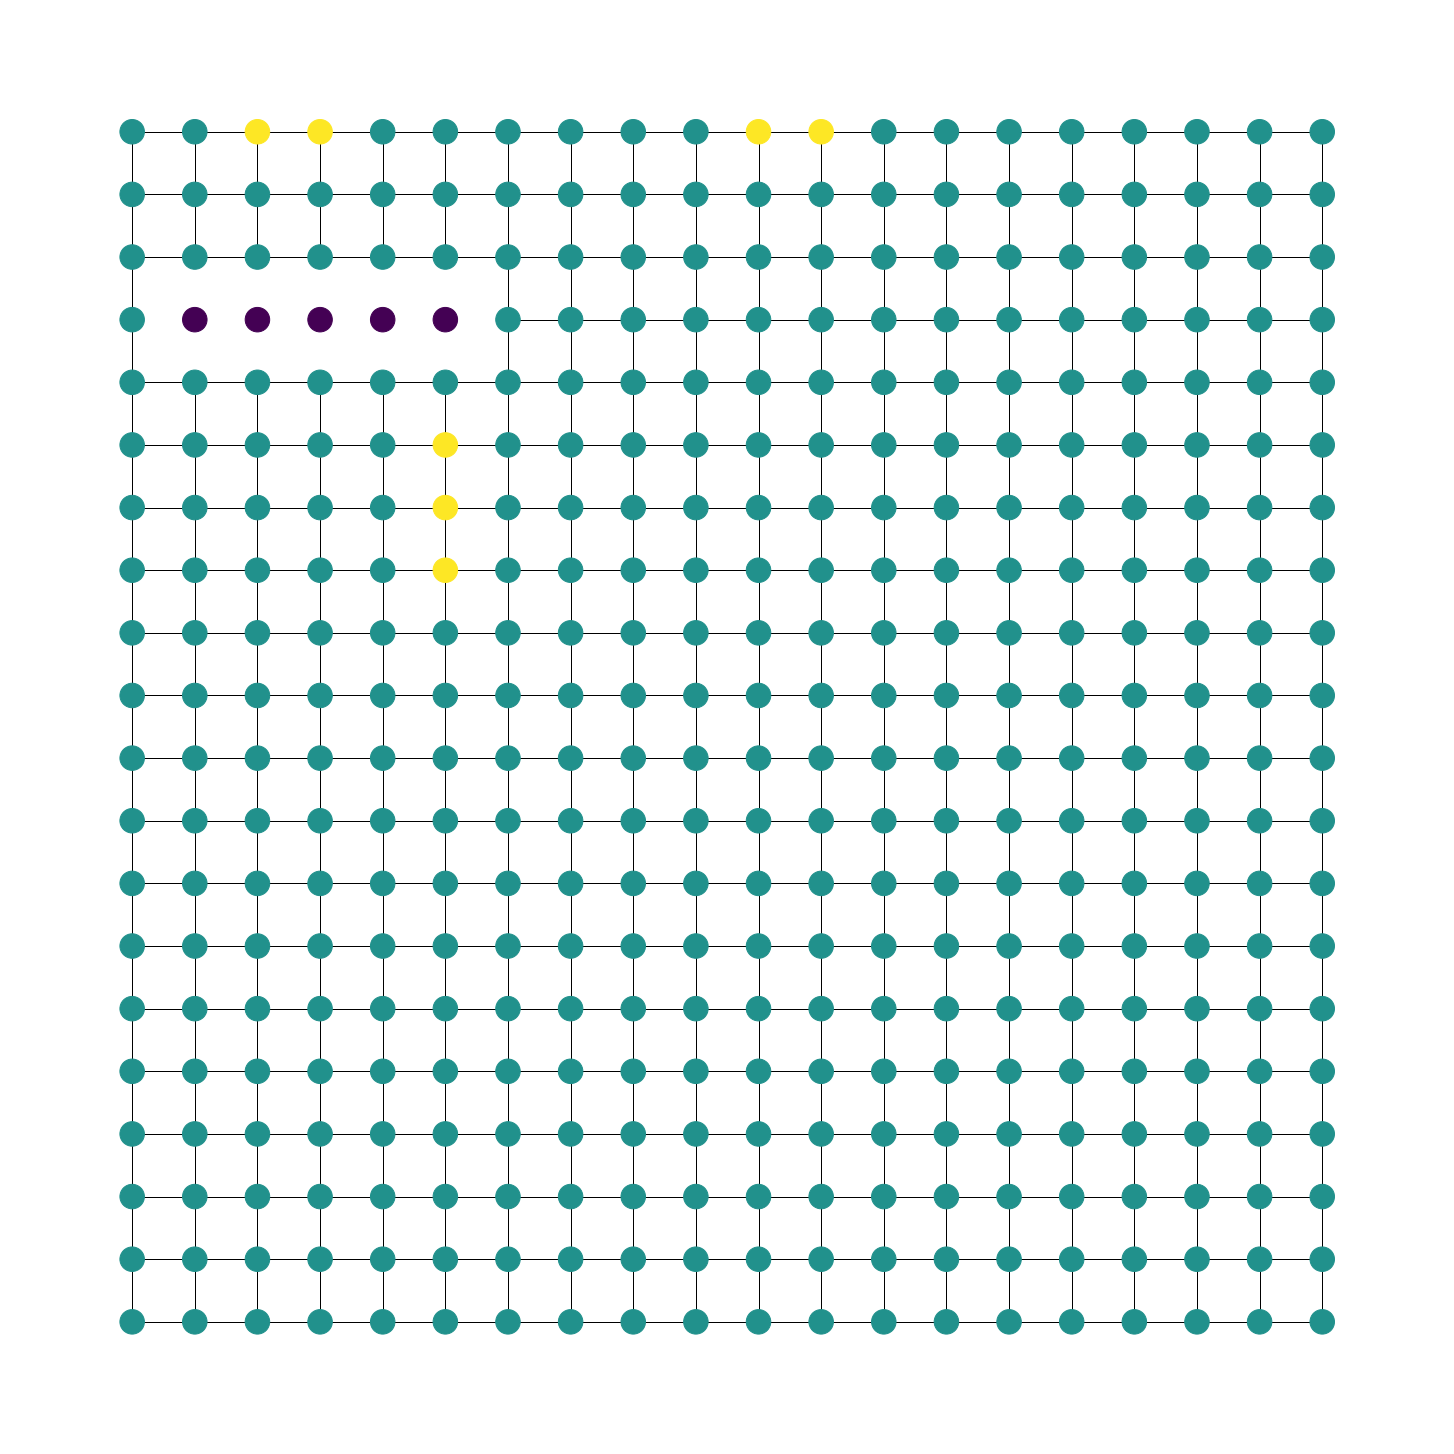

In [6]:
g = model.graph

plt.figure(figsize=(config["width"], config["height"]))
pos = {(x,y):(x,-y) for x,y in g.nodes()}

val_map = {}
for x, y in pos:
#     if x == 0 or x == config["width"]-1 or y == 0 or y == config["height"]-1:
#         val_map[(x,y)] = 0.0
        
    for coords in model.objectives.values():
        if (x,y) in coords:
            val_map[(x,y)] = 0.5
            
    if (x,y) in [obj.pos for obj in model.obstacles]:
        val_map[(x,y)] = 0.0
        
values = [val_map.get(node, 0.25) for node in g.nodes()]

nx.draw(g, pos=pos, 
        node_color=values, 
        node_size=600)

In [7]:
# print(g.edges)

In [8]:
data = model.datacollector.get_model_vars_dataframe()

In [9]:
print(data)

    standing_still  n_persons  n_done                 persons  \
0                0          0       0                      []   
1                0          1       0             [Person 13]   
2                0          2       0  [Person 13, Person 14]   
3                0          2       0  [Person 13, Person 14]   
4                0          2       0  [Person 13, Person 14]   
..             ...        ...     ...                     ...   
62               0          1       4             [Person 17]   
63               0          1       4             [Person 17]   
64               0          1       4             [Person 17]   
65               0          1       4             [Person 17]   
66               0          0       5                      []   

                          person_locs       steps_in_stores            speed  \
0                                  []                    []               []   
1                            [(3, 0)]                   [0]

In [10]:
for row in data["densities"]:
    print(row)

[0.0, 0.0]
[0.0, 0.018518518518518517]
[0.0, 0.037037037037037035]
[0.0, 0.037037037037037035]
[0.0, 0.037037037037037035]
[0.0, 0.037037037037037035]
[0.0, 0.05555555555555555]
[0.0, 0.07407407407407407]
[0.0, 0.09259259259259259]
[0.0, 0.09259259259259259]
[0.0, 0.09259259259259259]
[0.0, 0.09259259259259259]
[0.0, 0.09259259259259259]
[0.0, 0.09259259259259259]
[0.0, 0.09259259259259259]
[0.0, 0.09259259259259259]
[0.0, 0.09259259259259259]
[0.0, 0.07407407407407407]
[0.0, 0.07407407407407407]
[0.0, 0.05555555555555555]
[0.0, 0.05555555555555555]
[0.0, 0.05555555555555555]
[0.0, 0.05555555555555555]
[0.0, 0.05555555555555555]
[0.0, 0.05555555555555555]
[0.0, 0.05555555555555555]
[0.0, 0.05555555555555555]
[0.0, 0.05555555555555555]
[0.0, 0.037037037037037035]
[0.0, 0.037037037037037035]
[0.0, 0.037037037037037035]
[0.0, 0.037037037037037035]
[0.0, 0.037037037037037035]
[0.0, 0.037037037037037035]
[0.0, 0.037037037037037035]
[0.0, 0.037037037037037035]
[0.0, 0.037037037037037035]
[0.